In [1]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#reading data
dataset = pd.read_csv("/content/User_Data.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
#output variable ie purchased has 2 category 0/1
dataset['Purchased'].unique()

array([0, 1])

In [6]:
dataset=pd.get_dummies(dataset).astype(int)
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


In [9]:
# input
x = dataset.iloc[:, [1,2,4,5]].values

# output
y = dataset.iloc[:, 3].values
x

array([[   19, 19000,     0,     1],
       [   35, 20000,     0,     1],
       [   26, 43000,     1,     0],
       ...,
       [   50, 20000,     1,     0],
       [   36, 33000,     0,     1],
       [   49, 36000,     1,     0]])

In [7]:
dataset.shape

(400, 6)

In [10]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print(dataset.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(400, 6) (300, 4) (100, 4) (300,) (100,)


In [ ]:
X_train

In [11]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500,0.510000,0.490000
std,7.165832e+04,10.482877,34096.960282,0.479864,0.500526,0.500526
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000,1.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000,1.000000


In [12]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)



In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [14]:
y_pred = classifier.predict(X_test)
print(y_pred,y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1] [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [ ]:
help(LogisticRegression)

In [15]:
pred_comp_test=pd.DataFrame({'actual':y_test,'Pred':y_pred})
pred_comp_test


,actual,Pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,1
98,1,1


In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[64  4]
 [ 5 27]]


In [17]:
(64+27)/(64+4+5+27)

0.91

In [18]:
from sklearn.metrics import accuracy_score
print('accurace:',accuracy_score(y_test,y_pred))

accurace: 0.91


In [19]:
from sklearn.metrics import classification_report
cm_class_test=classification_report(y_test,y_pred)
print(cm_class_test)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



In [ ]:
((.93)+(.86))/2

0.895

In [20]:
y_pred_train = classifier.predict(X_train)


In [21]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_pred_train, y_train)

print ("Confusion Matrix : \n", cm_train)


Confusion Matrix : 
 [[172  33]
 [ 17  78]]


In [22]:
(172+78)/(172+33+17+78)

0.8333333333333334

In [23]:
from sklearn.metrics import classification_report
cm_class_train=classification_report(y_pred_train, y_train)
print(cm_class_train)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       205
           1       0.70      0.82      0.76        95

    accuracy                           0.83       300
   macro avg       0.81      0.83      0.82       300
weighted avg       0.84      0.83      0.84       300



In [ ]:
(172+75)/(172+36+17+75)

In [ ]:
from sklearn.metrics import accuracy_score
print('accurace:',accuracy_score(y_train,y_pred_train))

accurace: 0.8333333333333334


In [24]:
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(y_test,y_pred)

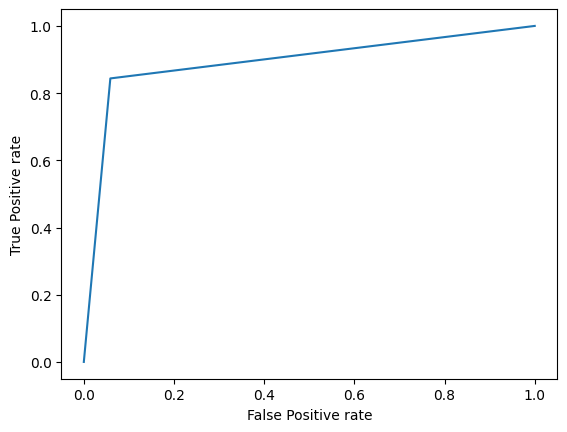

In [25]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred)

In [ ]:
auc

0.8924632352941176

In [26]:
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(y_train,y_pred_train)

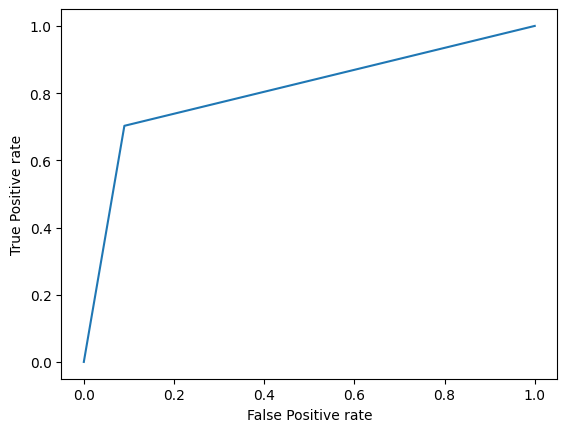

In [27]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [28]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's